   ## Spliting target variable (x)and predictor variable (y)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [7]:

marketing_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')


In [8]:
X = marketing_df.select_dtypes(np.number)
y = marketing_df.total_claim_amount
X.drop('total_claim_amount', axis = 1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Splitting Training Set and Testing Set

In [10]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
2705,4786,45515,61,10,33,0,9,236
2209,22445,80340,71,32,35,0,2,511
4004,6412,58776,83,20,50,2,4,478


### Standardizing Data

In [18]:
from sklearn.preprocessing import StandardScaler
pt = PowerTransformer()
scaler = StandardScaler ()

ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [19]:
X_train_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies,pt__total_claim_amount
0,-0.340765,-0.143033,-1.552039,-0.350352,-0.428756,-0.502522,1.660057,-0.613776
1,1.732220,1.108667,-0.712384,1.463437,-0.354308,-0.502522,-0.063268,0.426856
2,0.142838,0.372284,-0.020814,0.582646,0.170412,2.032405,0.875803,0.321145
3,-1.841641,-0.002560,-1.178270,-0.700972,1.525083,-0.502522,-1.143833,1.149743
4,0.367618,-0.900458,0.496901,0.742711,0.302193,-0.502522,1.454127,0.228396
...,...,...,...,...,...,...,...,...
7477,0.199678,-0.194957,0.593059,0.240451,0.650895,2.032405,0.513168,1.004652
7478,0.928730,-0.082468,0.938141,0.971550,0.773350,-0.502522,-0.063268,1.245045
7479,-1.511516,1.656755,-1.178270,-0.040648,-0.428756,-0.502522,-1.143833,-2.011030
7480,-0.980688,-1.203165,0.200536,-0.461825,-1.644616,2.032405,-1.143833,0.132558


### Apply linear regression

In [20]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.091e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:52:45   Log-Likelihood:                -43571.
No. Observations:                7482   AIC:                         8.716e+04
Df Residuals:                    7473   BIC:                         8.722e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      0.947    460.461      0.0

### Error metrics

In [29]:
model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [30]:
model.coef_

array([ 3.06097750e+00,  3.88319978e+00,  2.74184578e+01,  2.35936521e+00,
        4.93113303e-01, -3.89369704e-02, -1.49531897e+00,  2.64647674e+02])

In [31]:
model.intercept_

435.82945736434215

In [47]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['target_d'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['target_d'])

In [46]:
yp_ = y_pred.to_numpy()
yt_ = y_test.to_numpy()

In [35]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

7256.760839650763
52.79341136109533
6694.862301462733


In [36]:
R2=r2_score(y_test,y_pred)
R2

0.9167862184730139

In [37]:
R2_test=model.score(X_test_ct,y_test)
R2_train=model.score(X_train_ct,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.9165780539163485

### Feature Importances

In [38]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
7,total_claim_amount,264.647674
2,monthly_premium_auto,27.418458
1,income,3.883200
0,customer_lifetime_value,3.060978
3,months_since_last_claim,2.359365
6,number_of_policies,1.495319
4,months_since_policy_inception,0.493113
5,number_of_open_complaints,0.038937


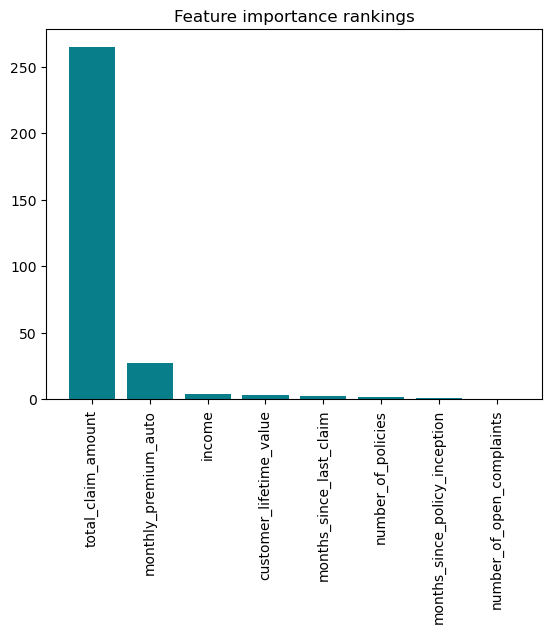

In [39]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()